<a href="https://colab.research.google.com/github/sushantkumar-estech/Directing-Customer-to-Subscription-through-App-behavior-analysis/blob/master/Directing_Customer_to_Subscription_through_App_behavior_analysis(modelbuilding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries

import pandas as pd # for data preprocessing
import numpy as np  # for data preprocessing  
import matplotlib.pyplot as plt # for plotting data
import seaborn as sn  # for plotting data
import time # parse datetime field

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/My Drive/ML_Dataset/FineTech_appData/new_appdata10.csv')

In [4]:
# Data Preprocessing

response = dataset['enrolled']
dataset = dataset.drop(columns='enrolled')
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0


In [5]:
# spiliting the data into training data and test data
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [6]:
# as user column will plax no role in  training the model, so needs to remove it, but need to keep in mind, that for identification, user id is required at the end,
# so saving user id in different variable and then dropping user column from training and testing dataset
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')


In [7]:
# scaling the training and testing data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values # Copying the same columns
X_test2.columns = X_test.columns.values # Copying the same columns

In [8]:
X_train2.index = X_train.index.values # incorporating the same index
X_test2.index = X_test.index.values # incorporating the same index

In [9]:
# Now converting the original training set it
X_train = X_train2
X_test = X_test2  # now all the features are normalized


## Model Building

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)#, #penalty = 'L1') # this penalty will change the model from LogisticRegression model to L1 logistic regression
# it penalises any variable that strongly correclated with the response variable


In [11]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.768

In [14]:
precision_score(y_test, y_pred)

0.7617422721798475

In [15]:
recall_score(y_test, y_pred)

0.7700892857142857

In [16]:
f1_score(y_test, y_pred) # f1 is a good to explain that the accuracy of our model is good or not

0.7658930373360243

Accuracy of Testing Data: 0.7680


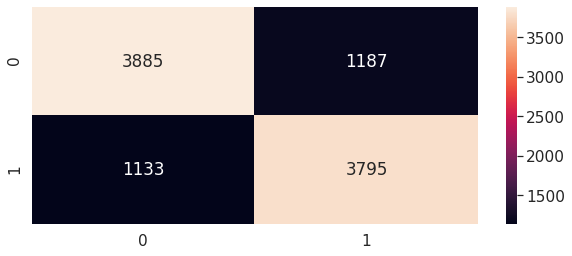

In [17]:
# plottig the confusion matrix
df_cm = pd.DataFrame(cm, index =  (0,1), columns= (0,1))
plt.figure(figsize= (10,4))
sn.set(font_scale= 1.4)
sn.heatmap(df_cm, annot = True, fmt = 'g')
print('Accuracy of Testing Data: %0.4f'  % accuracy_score(y_test, y_pred))

In [18]:
# K-fold corss validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" %(accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.767 (+/- 0.009)


In [19]:
# Formatting the final Results
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()
final_results["predicted_result"]  = y_pred
final_results[["user", "enrolled", "predicted_result"]].reset_index(drop = True)

,user,enrolled,predicted_result
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
